# Tasks generation

The purpose of this notebook is to generate different task sets to be executed by the controller and to rapidlly edit the '`tasks.h`' file in the '`emulator_cpu2`' folder.

In [1]:
# import random number generator
import random


Generate tasks sets with different sizes and random parameters, while keeping the sum of the weights between a given range.

In [2]:
task_set_size_min = 2
task_set_size_max = 7
sets_per_size = 10

task_set_weight_lower_bound = 50
task_set_weight_upper_bound = 100

task_set_size_vector = [i for i in range(task_set_size_min, task_set_size_max + 1)]

task_set_weight_matrix = []
task_set_period_matrix = []
task_set_computing_time_matrix = []
for task_set_size in task_set_size_vector:
    j = task_set_size - task_set_size_vector[0]
    task_set_weight_matrix.append([])
    task_set_period_matrix.append([])
    task_set_computing_time_matrix.append([])
    for n in range(sets_per_size):
        task_set_weight_matrix[j].append([])
        task_set_period_matrix[j].append([])
        task_set_computing_time_matrix[j].append([])
        for i in range(task_set_size):
            # task_set_weight_matrix[j][n].append(random.randint(1, task_set_weight_upper_bound))
            task_set_weight_matrix[j][n].append(
                random.randint(
                    max(1, int(task_set_weight_lower_bound / task_set_size)),
                    max(1, int(task_set_weight_upper_bound / task_set_size)),
                )
            )
            task_set_period_matrix[j][n].append(random.randint(10, 600))
            task_set_computing_time_matrix[j][n].append(
                random.randint(1, task_set_period_matrix[j][n][i])
            )
        while sum(task_set_weight_matrix[j][n]) < task_set_weight_lower_bound:
            _pos = random.randint(0, task_set_size - 1)
            if task_set_weight_matrix[j][n][_pos] < task_set_weight_upper_bound:
                task_set_weight_matrix[j][n][_pos] += 1
        while sum(task_set_weight_matrix[j][n]) > task_set_weight_upper_bound:
            _pos = random.randint(0, task_set_size - 1)
            if task_set_weight_matrix[j][n][_pos] > 1:
                task_set_weight_matrix[j][n][_pos] -= 1

sum_task_set_weights = []
for task_set_size in task_set_size_vector:
    j = task_set_size - task_set_size_vector[0]
    sum_task_set_weights.append([])
    for n in range(sets_per_size):
        sum_task_set_weights[j].append(sum(task_set_weight_matrix[j][n]))


Use the block below to import the task sets from the text files.

In [1]:
task_set_size_min = 2
task_set_size_max = 7
sets_per_size = 10

task_set_size_vector = [i for i in range(task_set_size_min, task_set_size_max + 1)]

task_set_weight_matrix = []
task_set_period_matrix = []
task_set_computing_time_matrix = []
sum_task_set_weights = []

text = []
for task_set_size in task_set_size_vector:
    j = task_set_size - task_set_size_vector[0]
    for n in range(sets_per_size):
        file_name = (
            "./tasks/set_n" + str(task_set_size) + "_case_" + str(n + 1) + ".txt"
        )
        f = open(file_name, "r")
        text.append(f.read())

for r in range(len(task_set_size_vector) * sets_per_size):
    text[r] = text[r].split(";")
    for s in range(4):
        text[r][s] = text[r][s].split(",")

task_set_weight_matrix = []
task_set_period_matrix = []
task_set_computing_time_matrix = []
sum_task_set_weights = []

for task_set_size in task_set_size_vector:
    j = task_set_size - task_set_size_vector[0]
    task_set_weight_matrix.append([])
    task_set_period_matrix.append([])
    task_set_computing_time_matrix.append([])
    sum_task_set_weights.append([])
    for n in range(sets_per_size):
        task_set_weight_matrix[j].append([])
        task_set_period_matrix[j].append([])
        task_set_computing_time_matrix[j].append([])
        sum_task_set_weights[j].append([])
        for i in range(task_set_size):
            task_set_weight_matrix[j][n].append(int(text[j * sets_per_size + n][1][i]))
            task_set_period_matrix[j][n].append(int(text[j * sets_per_size + n][2][i]))
            task_set_computing_time_matrix[j][n].append(
                int(text[j * sets_per_size + n][3][i])
            )
        sum_task_set_weights[j][n] = sum(task_set_weight_matrix[j][n])


In [ ]:
# Print the tasks sets
for task_set_size in task_set_size_vector:
    j = task_set_size - task_set_size_vector[0]
    for n in range(sets_per_size):
        print(task_set_weight_matrix[j][n])
        print(task_set_period_matrix[j][n])
        print(task_set_computing_time_matrix[j][n])
        print(sum(task_set_weight_matrix[j][n]))


This block export everything to .txt files

In [6]:
for task_set_size in task_set_size_vector:
    j = task_set_size - task_set_size_vector[0]
    for n in range(sets_per_size):
        file_name = (
            "./tasks/set_n" + str(task_set_size) + "_case_" + str(n + 1) + ".txt"
        )
        f = open(file_name, "w+")
        f.write(str(sum_task_set_weights[j][n]) + ";\n")
        for i in range(task_set_size):
            if i == task_set_size - 1:
                f.write(str(task_set_weight_matrix[j][n][i]) + ";\n")
            else:
                f.write(str(task_set_weight_matrix[j][n][i]) + ",")
        for i in range(task_set_size):
            if i == task_set_size - 1:
                f.write(str(task_set_period_matrix[j][n][i]) + ";\n")
            else:
                f.write(str(task_set_period_matrix[j][n][i]) + ",")
        for i in range(task_set_size):
            if i == task_set_size - 1:
                f.write(str(task_set_computing_time_matrix[j][n][i]) + ";\n")
            else:
                f.write(str(task_set_computing_time_matrix[j][n][i]) + ",")
        f.close()


This block changes the '`tasks.h`' file in the '`emulator_cpu2`' folder and the '`main_cpu1.c`' file the '`emulator_cpu1`' folder.

In [3]:
selected_task_set_size = 7
selected_task_set_from_size = 1

j = selected_task_set_size - task_set_size_vector[0]
n = selected_task_set_from_size - 1

f = open("../../emulator_cpu2/tasks.h", "w+")
f.write(
    "/**\n"
    " * @file tasks.h\n"
    " * @author Vinicius Pimenta Bernardo (viniciuspibi@gmail.com)\n"
    " * @brief This file contains the tasks definitions.\n"
    " * @version 0.1\n"
    " * @date 2022-02-01\n"
    " * \n"
    " * @copyright Copyright (c) 2022\n"
    " * \n"
    " */\n"
    "\n"
    "#ifndef TASKS_H_\n"
    "#define TASKS_H_\n"
    "\n"
    "#include <stdint.h>\n"
    "#include <stdbool.h>\n"
    "\n"
    "#define TASK_COUNT " + str(selected_task_set_size) + "\n"
    "#define SUM_OF_WEIGHTS " + str(sum_task_set_weights[j][n]) + "\n"
    "\n"
    "const uint32_t      weights[TASK_COUNT] = {"
)
for i in range(selected_task_set_size):
    if i == selected_task_set_size - 1:
        f.write(str(task_set_weight_matrix[j][n][i]))
    else:
        f.write(str(task_set_weight_matrix[j][n][i]) + ", ")
f.write("};\n" "const uint32_t      task_period[TASK_COUNT] = {")
for i in range(selected_task_set_size):
    if i == selected_task_set_size - 1:
        f.write(str(task_set_period_matrix[j][n][i]))
    else:
        f.write(str(task_set_period_matrix[j][n][i]) + ", ")
f.write("};\n" "const uint32_t      task_computing_time[TASK_COUNT] = {")
for i in range(selected_task_set_size):
    if i == selected_task_set_size - 1:
        f.write(str(task_set_computing_time_matrix[j][n][i]))
    else:
        f.write(str(task_set_computing_time_matrix[j][n][i]) + ", ")
f.write(
    "};\n"
    "\n"
    "volatile uint32_t   values[TASK_COUNT];\n"
    "volatile bool       task_on_off_status[TASK_COUNT];\n"
    "volatile uint32_t   task_deadline[TASK_COUNT];\n"
    "volatile uint32_t   task_executed_time[TASK_COUNT];\n"
    "volatile bool       task_already_executed[TASK_COUNT];\n"
    "\n"
    "#endif /* TASKS_H_ */\n"
)
f.close()

f = open("../../emulator_cpu1/main_cpu1.c", "w+")
f.write(
    "/**\n"
    " * @file main_cpu1.c\n"
    " * @author Vinicius Pimenta Bernardo (viniciuspibi@gmail.com)\n"
    " * @brief This file contains the main function for CPU1.\n"
    " * @version 0.1\n"
    " * @date 2022-01-28\n"
    " * \n"
    " * @copyright Copyright (c) 2022\n"
    " * \n"
    " */\n"
    "\n"
    "//############################################################################\n"
    "// $Copyright:\n"
    "// Copyright (C) 2020 Texas Instruments Incorporated - http://www.ti.com/\n"
    "//\n"
    "// Redistribution and use in source and binary forms, with or without \n"
    "// modification, are permitted provided that the following conditions \n"
    "// are met:\n"
    "// \n"
    "//   Redistributions of source code must retain the above copyright \n"
    "//   notice, this list of conditions and the following disclaimer.\n"
    "// \n"
    "//   Redistributions in binary form must reproduce the above copyright\n"
    "//   notice, this list of conditions and the following disclaimer in the \n"
    "//   documentation and/or other materials provided with the   \n"
    "//   distribution.\n"
    "// \n"
    "//   Neither the name of Texas Instruments Incorporated nor the names of\n"
    "//   its contributors may be used to endorse or promote products derived\n"
    "//   from this software without specific prior written permission.\n"
    "// \n"
    "// THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS \n"
    '// "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT \n'
    "// LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR\n"
    "// A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT \n"
    "// OWNER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, \n"
    "// SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT \n"
    "// LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE,\n"
    "// DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY\n"
    "// THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT \n"
    "// (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE \n"
    "// OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.\n"
    "// $\n"
    "//############################################################################\n"
    "\n"
    "#include <stdio.h>\n"
    "#include <stdint.h>\n"
    "#include <stdlib.h>\n"
    "#include <string.h>\n"
    "\n"
    '#include "driverlib.h"\n'
    '#include "device.h"\n'
    '#include "ipc.h"\n'
    "\n"
    '#include "rand_generator.h"\n'
    "\n"
    "// User config defines *********************\n"
    "#define USE_TIMER 0\n"
    "#define USE_ADC 1\n"
    "#define RECV_W 0\n"
    "\n"
    "#define TIMER0_PERIOD_MS 100\n"
    "#define SCIA_BAURATE 9600\n"
    "\n"
    "#define TASK_COUNT " + str(selected_task_set_size) + "\n"
    "//******************************************\n"
    "// Don't change this section ***************\n"
    "#if !USE_TIMER\n"
    "#ifdef USE_ADC\n"
    "#undef USE_ADC\n"
    "#define USE_ADC USE_TIMER\n"
    "#endif\n"
    "#endif\n"
    "//******************************************\n"
    "\n"
    "// LEDs pins.\n"
    "uint32_t GPIO_pins[] = {104U, 105U, 22U};\n"
    "\n"
    "#if USE_TIMER\n"
    "/**\n"
    " * @brief Timer 0 Interrupt Service Routine.\n"
    " */\n"
    "__interrupt void cpuTimer0ISR(void);\n"
    "\n"
    "/**\n"
    " * @brief Initialize timer 0\n"
    " * \n"
    " * @param[in] freq System clock frequency\n"
    " * @param[in] period Timer period\n"
    " */\n"
    "void initCPUTimer0(float freq, float period);\n"
    "\n"
    "#if USE_ADC\n"
    "/**\n"
    " * @brief Initialize ADC A.\n"
    " */\n"
    "void initADCA(void);\n"
    "\n"
    "/**\n"
    " * @brief Initialize ADC A start-of-conversion (SOC).\n"
    " */\n"
    "void initADCASOC(void);\n"
    "#endif\n"
    "\n"
    "#else\n"
    "\n"
    "/**\n"
    " * @brief Initialize Serial Communication Interface A.\n"
    " */\n"
    "void initSCIA(void);\n"
    "\n"
    "#endif\n"
    "\n"
    "/**\n"
    " * @brief CPU1 main function.\n"
    " */\n"
    "void main(void)\n"
    "{\n"
    "    int j;\n"
    "    // Configure system clock and PLL, enable peripherals, and configure\n"
    "    // flash if used.\n"
    "    Device_init();\n"
    "\n"
    "#ifdef _STANDALONE\n"
    "#ifdef _FLASH\n"
    "    // TODO check to see if this breaks.\n"
    "    Device_bootCPU2(BOOTMODE_BOOT_TO_FLASH_SECTOR0);\n"
    "#else\n"
    "    // TODO this breaks the RAM build.\n"
    "    Device_bootCPU2(BOOTMODE_BOOT_TO_M0RAM);\n"
    "#endif\n"
    "#endif\n"
    "\n"
    "    // Initialize GPIO and configure the GPIO pin as a push-pull output.\n"
    "    Device_initGPIO();\n"
    "\n"
    "#if USE_TIMER\n"
    "    int i;\n"
    "    for (i = 0; i < (sizeof(GPIO_pins)/sizeof(uint32_t)); i++)\n"
    "    {\n"
    "        GPIO_setPadConfig(GPIO_pins[i], GPIO_PIN_TYPE_STD);\n"
    "        GPIO_setDirectionMode(GPIO_pins[i], GPIO_DIR_MODE_OUT);\n"
    "    }\n"
    "#else\n"
    "    // Configuration for the SCI Rx pin.\n"
    "    GPIO_setMasterCore(DEVICE_GPIO_PIN_SCIRXDA, GPIO_CORE_CPU1);\n"
    "    GPIO_setPinConfig(DEVICE_GPIO_CFG_SCIRXDA);\n"
    "    GPIO_setDirectionMode(DEVICE_GPIO_PIN_SCIRXDA, GPIO_DIR_MODE_IN);\n"
    "    GPIO_setPadConfig(DEVICE_GPIO_PIN_SCIRXDA, GPIO_PIN_TYPE_STD);\n"
    "    GPIO_setQualificationMode(DEVICE_GPIO_PIN_SCIRXDA, GPIO_QUAL_ASYNC);\n"
    "\n"
    "    // Configuration for the SCI Tx pin.\n"
    "    GPIO_setMasterCore(DEVICE_GPIO_PIN_SCITXDA, GPIO_CORE_CPU1);\n"
    "    GPIO_setPinConfig(DEVICE_GPIO_CFG_SCITXDA);\n"
    "    GPIO_setDirectionMode(DEVICE_GPIO_PIN_SCITXDA, GPIO_DIR_MODE_OUT);\n"
    "    GPIO_setPadConfig(DEVICE_GPIO_PIN_SCITXDA, GPIO_PIN_TYPE_STD);\n"
    "    GPIO_setQualificationMode(DEVICE_GPIO_PIN_SCITXDA, GPIO_QUAL_ASYNC);\n"
    "#endif\n"
    "\n"
    "    // Initialize the PIE module and vector table.\n"
    "    Interrupt_initModule();\n"
    "    Interrupt_initVectorTable();\n"
    "\n"
    "    // Clear any IPC flags if set already\n"
    "    IPC_clearFlagLtoR(IPC_CPU1_L_CPU2_R, IPC_FLAG_ALL);\n"
    "\n"
    "    // Synchronize both the cores.\n"
    "    IPC_sync(IPC_CPU1_L_CPU2_R, IPC_FLAG17);\n"
    "\n"
    "    // Enable global interrupts.\n"
    "    EINT;\n"
    "    // Enable real-time debug.\n"
    "    ERTM;\n"
    "\n"
    "#if USE_TIMER\n"
    "#if USE_ADC\n"
    "    initADCA();\n"
    "    initADCASOC();\n"
    "#endif\n"
    "    initCPUTimer0(DEVICE_SYSCLK_FREQ, TIMER0_PERIOD_MS * 1000UL);\n"
    "#else\n"
    "    initSCIA();\n"
    "#if !RECV_W\n"
    "    uint32_t PspTotal = 0UL, Pload = 0UL;\n"
    "#else\n"
    "    uint32_t W = 0UL;\n"
    "#endif\n"
    "    uint16_t rxStatus = 0U;\n"
    "#endif\n"
    "    uint32_t IPCresponse = 0UL;\n"
    "    uint16_t deadline_loss_counter = 0U;\n"
    "\n"
    "    while(1)\n"
    "    {\n"
    "#if !USE_TIMER\n"
    "#if !RECV_W\n"
    "        // Read a character from the FIFO.\n"
    "        PspTotal = (uint32_t) SCI_readCharBlockingFIFO(SCIA_BASE);\n"
    "\n"
    "        rxStatus = SCI_getRxStatus(SCIA_BASE);\n"
    "        if((rxStatus & SCI_RXSTATUS_ERROR) != 0)\n"
    "        {\n"
    "            //If Execution stops here there is some error\n"
    "            //Analyze SCI_getRxStatus() API return value\n"
    "            ESTOP0;\n"
    "        }\n"
    "\n"
    "        // Read another character from the FIFO.\n"
    "        Pload = (uint32_t) SCI_readCharBlockingFIFO(SCIA_BASE);\n"
    "\n"
    "        rxStatus = SCI_getRxStatus(SCIA_BASE);\n"
    "        if((rxStatus & SCI_RXSTATUS_ERROR) != 0)\n"
    "        {\n"
    "            //If Execution stops here there is some error\n"
    "            //Analyze SCI_getRxStatus() API return value\n"
    "            ESTOP0;\n"
    "        }\n"
    "\n"
    "        PspTotal *= 10;\n"
    "        Pload *= 10;\n"
    "\n"
    '        printf("CPU1: Sending data: %lu %lu\\n", PspTotal, Pload);\n'
    "\n"
    "        // Send a message without message queue\n"
    "        IPC_sendCommand(IPC_CPU1_L_CPU2_R, IPC_FLAG0, IPC_ADDR_CORRECTION_ENABLE,\n"
    "        PspTotal, 0, Pload);\n"
    "#else\n"
    "        // Read a character from the FIFO.\n"
    "        W = (uint32_t) SCI_readCharBlockingFIFO(SCIA_BASE);\n"
    "\n"
    "        rxStatus = SCI_getRxStatus(SCIA_BASE);\n"
    "        if((rxStatus & SCI_RXSTATUS_ERROR) != 0)\n"
    "        {\n"
    "            //If Execution stops here there is some error\n"
    "            //Analyze SCI_getRxStatus() API return value\n"
    "            ESTOP0;\n"
    "        }\n"
    "\n"
    '        printf("CPU1: Sending data: %lu\\n", W);\n'
    "\n"
    "        // Send a message without message queue\n"
    "        IPC_sendCommand(IPC_CPU1_L_CPU2_R, IPC_FLAG0, IPC_ADDR_CORRECTION_ENABLE,\n"
    "        0, 0, W);\n"
    "#endif\n"
    "        // Wait for acknowledgment\n"
    "        IPC_waitForAck(IPC_CPU1_L_CPU2_R, IPC_FLAG0);\n"
    "\n"
    "        // Read response\n"
    "        IPCresponse = IPC_getResponse(IPC_CPU1_L_CPU2_R);\n"
    "\n"
    "        // Get deadline_loss_counter from first half of response\n"
    "        deadline_loss_counter = (uint16_t) (IPCresponse >> 16);\n"
    "\n"
    '        printf("CPU1: Received data: 0b");\n'
    "        for (j = TASK_COUNT - 1; j >= 0; j--)\n"
    "        {\n"
    '            printf(((IPCresponse >> j) & 0x1UL) ? "1" : "0");\n'
    "        }\n"
    '        printf(" %d\\n", deadline_loss_counter);\n'
    "\n"
    "        // Clear CPU interrupt flag\n"
    "        Interrupt_clearACKGroup(INTERRUPT_ACK_GROUP1);\n"
    "\n"
    "        for (j = 0; j < TASK_COUNT; j++)\n"
    "        {\n"
    "            // For each bit in uartData, send '1' or '0' via SCI\n"
    "            ((IPCresponse >> j) & 1UL) ? SCI_writeCharBlockingFIFO(SCIA_BASE, '1') : SCI_writeCharBlockingFIFO(SCIA_BASE, '0');\n"
    "        }\n"
    "\n"
    "        // Send uint16_t as two separate char messages (less significant byte first)\n"
    "        SCI_writeCharBlockingFIFO(SCIA_BASE, (deadline_loss_counter & 0xFFU));\n"
    "        SCI_writeCharBlockingFIFO(SCIA_BASE, (deadline_loss_counter >> 8));\n"
    "#endif\n"
    "    }\n"
    "}\n"
    "\n"
    "#if USE_TIMER\n"
    "__interrupt void cpuTimer0ISR(void)\n"
    "{\n"
    "    uint32_t data;\n"
    "    int i;\n"
    "\n"
    "#if USE_ADC\n"
    "    uint16_t ADCA_Result;\n"
    "    // Convert, wait for completion, and store results\n"
    "    ADC_forceMultipleSOC(ADCA_BASE, ADC_FORCE_SOC0);\n"
    "\n"
    "    // Wait for ADCA to complete, then acknowledge flag\n"
    "    while(ADC_getInterruptStatus(ADCA_BASE, ADC_INT_NUMBER1) == false);\n"
    "    ADC_clearInterruptStatus(ADCA_BASE, ADC_INT_NUMBER1);\n"
    "    \n"
    "    // Store results\n"
    "    ADCA_Result = ADC_readResult(ADCARESULT_BASE, ADC_SOC_NUMBER0);\n"
    "\n"
    "    data = (((uint32_t)ADCA_Result) * 100) / 4095;\n"
    "#else /* Use random number generator instead */\n"
    "    data = rand_generator();\n"
    "#endif /* USE_ADC */\n"
    "\n"
    '    printf("CPU1: Sending data: %ld\\n", data);\n'
    "\n"
    "    // Send a message without message queue\n"
    "    IPC_sendCommand(IPC_CPU1_L_CPU2_R, IPC_FLAG0, IPC_ADDR_CORRECTION_ENABLE,\n"
    "    0, 0, data);\n"
    "\n"
    "    // Wait for acknowledgment\n"
    "    IPC_waitForAck(IPC_CPU1_L_CPU2_R, IPC_FLAG0);\n"
    "\n"
    "    // Read response\n"
    "    data = IPC_getResponse(IPC_CPU1_L_CPU2_R);\n"
    "\n"
    "    for (i = 0; i < (sizeof(GPIO_pins)/sizeof(uint32_t)); i++)\n"
    "    {\n"
    "        if ((data >> i) & 1UL)\n"
    "        {\n"
    "            GPIO_writePin(GPIO_pins[i], 1);\n"
    "        }\n"
    "        else\n"
    "        {\n"
    "            GPIO_writePin(GPIO_pins[i], 0);\n"
    "        }\n"
    "    }\n"
    '    printf("CPU1: Received data: %ld\\n", data);\n'
    "\n"
    "    // Clear CPU interrupt flag\n"
    "    Interrupt_clearACKGroup(INTERRUPT_ACK_GROUP1);\n"
    "}\n"
    "\n"
    "void initCPUTimer0(float freq, float period)\n"
    "{\n"
    "    uint32_t temp;\n"
    "    // Initialize timer period\n"
    "    temp = (uint32_t)(freq / 1000000 * period);\n"
    "    CPUTimer_setPeriod(CPUTIMER0_BASE, temp);\n"
    "\n"
    "    // Initialize pre-scale counter to divide by 1 (SYSCLKOUT)\n"
    "    CPUTimer_setPreScaler(CPUTIMER0_BASE, 0);\n"
    "\n"
    "    // Make sure timer is stopped\n"
    "    CPUTimer_stopTimer(CPUTIMER0_BASE);\n"
    "\n"
    "    // Reload counter register with period value\n"
    "    CPUTimer_reloadTimerCounter(CPUTIMER0_BASE);\n"
    "\n"
    "    // Register interrupt handler\n"
    "    Interrupt_register(INT_TIMER0, &cpuTimer0ISR);\n"
    "\n"
    "    // Disable free run\n"
    "    CPUTimer_setEmulationMode(CPUTIMER0_BASE, CPUTIMER_EMULATIONMODE_STOPAFTERNEXTDECREMENT);\n"
    "\n"
    "    // Enable timer interrupt\n"
    "    CPUTimer_enableInterrupt(CPUTIMER0_BASE);\n"
    "\n"
    "    // Enable CPU int1, which is connected to CPU-Timer 0\n"
    "    Interrupt_enable(INT_TIMER0);\n"
    "\n"
    "    // Start timer\n"
    "    CPUTimer_startTimer(CPUTIMER0_BASE);\n"
    "}\n"
    "\n"
    "#if USE_ADC\n"
    "void initADCA(void)\n"
    "{\n"
    "    // Set ADCDLK divider to /4\n"
    "    ADC_setPrescaler(ADCA_BASE, ADC_CLK_DIV_4_0);\n"
    "\n"
    "    // Set resolution and signal mode and load\n"
    "    // corresponding trims.\n"
    "    ADC_setMode(ADCA_BASE, ADC_RESOLUTION_12BIT, ADC_MODE_SINGLE_ENDED);\n"
    "\n"
    "    // Set pulse positions to late\n"
    "    ADC_setInterruptPulseMode(ADCA_BASE, ADC_PULSE_END_OF_CONV);\n"
    "\n"
    "    // Power up the ADC and delay for 1 ms\n"
    "    ADC_enableConverter(ADCA_BASE);\n"
    "\n"
    "    DEVICE_DELAY_US(1000);\n"
    "}\n"
    "\n"
    "void initADCASOC(void)\n"
    "{   \n"
    "    // Configure SOC0 to convert pin A0 by software only\n"
    "    ADC_setupSOC(ADCA_BASE, ADC_SOC_NUMBER0, ADC_TRIGGER_SW_ONLY,\n"
    "                 ADC_CH_ADCIN0, 15);\n"
    "\n"
    "    // Set SOC0 to set interrupt 1 flag. Enable the interrupt and make\n"
    "    // sure irs flag is cleared.\n"
    "    ADC_setInterruptSource(ADCA_BASE, ADC_INT_NUMBER1, ADC_SOC_NUMBER0);\n"
    "    ADC_enableInterrupt(ADCA_BASE, ADC_INT_NUMBER1);\n"
    "    ADC_clearInterruptStatus(ADCA_BASE, ADC_INT_NUMBER1);\n"
    "}\n"
    "#endif\n"
    "\n"
    "#else\n"
    "\n"
    "void initSCIA()\n"
    "{\n"
    "    SCI_performSoftwareReset(SCIA_BASE);\n"
    "\n"
    "    // 8 char bits, 1 stop bit, no parity.\n"
    "    SCI_setConfig(SCIA_BASE, DEVICE_LSPCLK_FREQ, SCIA_BAURATE, (SCI_CONFIG_WLEN_8 |\n"
    "                                                                SCI_CONFIG_STOP_ONE |\n"
    "                                                                SCI_CONFIG_PAR_NONE));\n"
    "    SCI_resetChannels(SCIA_BASE);\n"
    "    SCI_resetRxFIFO(SCIA_BASE);\n"
    "    SCI_resetTxFIFO(SCIA_BASE);\n"
    "    SCI_clearInterruptStatus(SCIA_BASE, SCI_INT_TXFF | SCI_INT_RXFF);\n"
    "    SCI_enableFIFO(SCIA_BASE);\n"
    "    SCI_enableModule(SCIA_BASE);\n"
    "    SCI_performSoftwareReset(SCIA_BASE);\n"
    "\n"
    "#ifdef AUTOBAUD\n"
    "    // Perform an autobaud lock.\n"
    "    // SCI expects an 'a' or 'A' to lock the baud rate.\n"
    "    SCI_lockAutobaud(SCIA_BASE);\n"
    "#endif\n"
    "}\n"
    "\n"
    "#endif\n"
)
f.close()


Generate exponencial priority values look-up table.

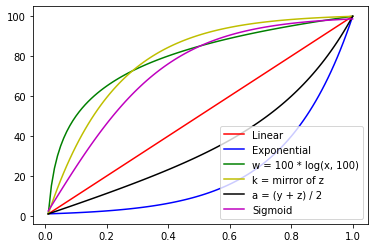

In [12]:
# import plot library
import matplotlib.pyplot as plt
from math import log, exp

x = [i / 100 for i in range(1, 101)]
y = [100 * x[i] for i in range(0, 100)]
z = [100 ** x[i] for i in range(0, 100)]
w = [100 * log((x[i] * 100), 100) for i in range(0, 100)]
w[0] = 1
k = [101 - z[99 - i] for i in range(0, 100)]
a = [(y[i] + z[i]) / 2 for i in range(0, 100)]

# c equals sigmoid function of x
c = [100 * ((2 / (1 + exp(-x[i] * 5))) - 1) for i in range(0, 100)]

# Z = ""
# # write z to Z as a c vector
# Z += "const uint16_t priority_exp_lut[] = {"
# for i in range(0, 100):
#     #if last one
#     if i == 99:
#         Z += str(round(z[i])) + "};"
#     else:
#         Z += str(round(z[i])) + ", "

# W = ""
# # write w to W as a c vector
# W += "const uint16_t priority_log_lut[] = {"
# for i in range(0, 100):
#     #if last one
#     if i == 99:
#         W += str(round(w[i])) + "};"
#     else:
#         W += str(round(w[i])) + ", "

# K = ""
# # write k to K as a c vector
# K += "const uint16_t priority_inv_lut[] = {"
# for i in range(0, 100):
#     #if last one
#     if i == 99:
#         K += str(round(k[i])) + "};"
#     else:
#         K += str(round(k[i])) + ", "

# print(Z)
# print(W)
# print(K)

# plot y and z
plt.plot(x, y, "r", label="Linear")
plt.plot(x, z, "b", label="Exponential")
plt.plot(x, w, "g", label="w = 100 * log(x, 100)")
plt.plot(x, k, "y", label="k = mirror of z")
plt.plot(x, a, "k", label="a = (y + z) / 2")
plt.plot(x, c, "m", label="Sigmoid")
plt.legend()
